<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Pra-Pemrosesan-Data" data-toc-modified-id="Pra-Pemrosesan-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Pra-Pemrosesan Data</a></span></li><li><span><a href="#Analisa-Data" data-toc-modified-id="Analisa-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Analisa Data</a></span></li><li><span><a href="#Menguji-Hipotesis" data-toc-modified-id="Menguji-Hipotesis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Menguji Hipotesis</a></span></li><li><span><a href="#Kesimpulan" data-toc-modified-id="Kesimpulan-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Kesimpulan</a></span></li></ul></div>

## Introduction 

Kita mendapatkan 3 data, yaitu data perusahan taksi, lokasi perjalanan terakhir dan informasi perjalanan dari kota Loop ke Bandara Internasional O'Hare. Dari data ini, kita diminta untuk mengidentifikasi dan menganalisa informasi apa yang bisa kita dapatkan dari data tersebut. 

Untuk bisa mendapatkan informasi yang relevan, pertama-tama kita perlu mengecek terlebih dahulu data yang kita terima tidak ada masalah dari tipe data ataupun duplikasi data. Proses ini disebut pra-pemrosesan data. Setelah data yang kita miliki sudah tidak ada masalah, langkah berikutnya adalah melakukan analisa data dan mencari informasi apa yang bisa kita simpulkan. Proses kedua ini disebut analisa data.

## Pra-Pemrosesan Data 

Pada bagian ini, kita akan melakukan pemeriksaan pada data yang kita miliki. Pertama-tama, kita perlu melakukan import semua library yang mungkin saja dibutuhkan, membaca semua data yang kita miliki ke variable, dan memahami informasi apa saja yang ada pada data tersebut.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats as st

In [2]:
df_company = pd.read_csv('datasets/project_sql_result_01.csv')
df_dropoff = pd.read_csv('datasets/project_sql_result_04.csv')

In [3]:
df_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
df_dropoff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [5]:
df_company.sample(20)

,company_name,trips_amount
16,Blue Diamond,2070
26,Gold Coast Taxi,428
60,2733 - 74600 Benny Jona,7
45,3011 - 66308 JBL Cab Inc.,25
31,American United Taxi Affiliation,210
30,Setare Inc,230
52,"3721 - Santamaria Express, Alvaro Santamaria",14
57,Metro Group,11
22,Chicago Independents,1296
17,Chicago Medallion Management,1955


In [6]:
df_dropoff.sample(20)

,dropoff_location_name,average_trips
40,Bucktown,74.300000
82,South Deering,7.500000
17,Edgewater,583.300000
31,Lower West Side,143.300000
53,Jackson Park,33.103448
10,Lincoln Park,1246.533333
26,Hyde Park,255.133333
68,Clearing,14.500000
29,Albany Park,180.900000
48,Austin,44.433333


Kita telah mendapatkan beberapa informasi singkat namun juga penting dari proses diatas. 
- Pertama, data yang kita miliki tidak terlalu banyak. 
- Kedua, tidak ada data dengan nilai yang hilang. 
- Ketiga, bila diperhatikan, tidak terdapat masalah pada tipe data yang diterapkan dengan data yang disimpan. 
- Keempat, dari penamaan kolom juga tidak ada masalah karena sudah menggunakan format lower camel case.

Namun, kita masih perlu memastikan apakah terdapat duplikasi data pada data yang kita terima.

In [7]:
df_company.duplicated().sum()
df_dropoff.duplicated().sum()

0

Dari hasil pengecekan, tidak ada data duplikat. Artinya, proses pertama sudah selesai, dan kita bisa melakukan proses berikutnya yaitu analisa data.

## Analisa Data 

Pertama, kita diminta untuk melakukan pengecekan 10 wilayah teratas yang sering dijadikan sebagai titik pengantaran. Kita akan mengurutkan  data yang perisi nama wilayah tempat perjalanan terakhir dari terbesar ke terkecil, dan mengambil 10 data pertamanya. Setelah itu, perlu ada sebuah graph untuk mempermudah visualisasi kita.

In [8]:
df_top_dropoff = df_dropoff.groupby('dropoff_location_name', as_index=False).agg({'average_trips': 'sum'}).sort_values(by='average_trips', ascending=False)
df_top_dropoff.head(10)

,dropoff_location_name,average_trips
50,Loop,10727.466667
68,River North,9523.666667
78,Streeterville,6664.666667
87,West Loop,5163.666667
63,O'Hare,2546.900000
44,Lake View,2420.966667
35,Grant Park,2068.533333
56,Museum Campus,1510.000000
32,Gold Coast,1364.233333
74,Sheffield & DePaul,1259.766667


<Axes: xlabel='dropoff_location_name'>

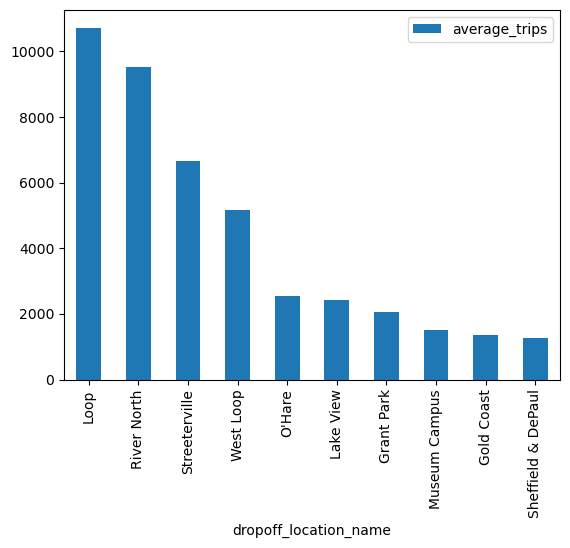

In [9]:
df_top_dropoff.head(10).plot(kind='bar', x='dropoff_location_name')

Kota Loop, River North, dan Streeterville menjadi kota destinasi terbanyak sebagai titik pengantaran secara berurut. Sedangkan kota sisanya berjarak setengah dari jumlah total destinasi ke kota Loop. Artinya, kota Loop menjadi kota yang paling populer di bulan November 2017. Berikutnya, kita akan menganalisa informasi mengenai perusahaan taksi.

In [10]:
df_company_grouped = df_company.groupby('company_name', as_index=False).agg({'trips_amount': 'sum'}).sort_values(by='trips_amount', ascending=False)
df_company_grouped.head(10)

,company_name,trips_amount
45,Flash Cab,19558
61,Taxi Affiliation Services,11422
50,Medallion Leasin,10367
63,Yellow Cab,9888
60,Taxi Affiliation Service Yellow,9299
36,Chicago Carriage Cab Corp,9181
43,City Service,8448
59,Sun Taxi,7701
58,Star North Management LLC,7455
33,Blue Ribbon Taxi Association Inc.,5953


<Axes: xlabel='company_name'>

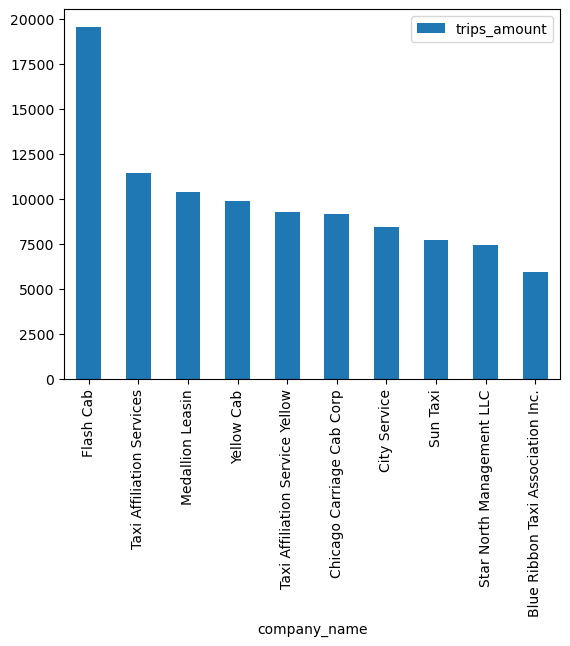

In [11]:
df_company_grouped.head(10).plot(kind='bar', x='company_name')

Flash Cab menjadi perusahaan taksi dengan jumlah perjalanan terbanyak pada tanggal 15-16 November 2017 dengan total hampir mencapai 20000 perjalanan.

## Menguji Hipotesis 

Pada tahap ini, kita mendapatkan hipotesis 0 yaitu "Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare berubah saat hujan di hari Sabtu". Di lain hal, kita juga mendapatkan data baru yang berisi tanggal, informasi cuaca, dan durasi perjalanan dari Loop ke Bandara Internasional O'Hare. 

Kita perlu memastikan data yang kita terima ini dapat diproses sebelum melakukan pengujian hipotesis. Cara yang dilakukan sama dengan sebelumnya, yaitu memastikan tidak ada nilai yang hilang, data duplikat, dan kesalahan pada tipe data.

In [12]:
df_loop_to_airport = pd.read_csv('datasets/project_sql_result_07.csv')

In [13]:
df_loop_to_airport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [14]:
df_loop_to_airport.sample(20)

,start_ts,weather_conditions,duration_seconds
7,2017-11-18 11:00:00,Good,2280.0
565,2017-11-04 04:00:00,Good,1440.0
718,2017-11-04 20:00:00,Good,2220.0
124,2017-11-11 10:00:00,Good,1380.0
576,2017-11-04 18:00:00,Bad,2280.0
588,2017-11-04 18:00:00,Bad,2580.0
340,2017-11-18 08:00:00,Bad,1440.0
294,2017-11-11 08:00:00,Good,1404.0
467,2017-11-25 07:00:00,Good,1409.0
1067,2017-11-04 16:00:00,Bad,2834.0


In [15]:
df_loop_to_airport['start_ts'] = pd.to_datetime(df_loop_to_airport['start_ts'], format='%Y-%m-%d %H:%M:%S')
df_loop_to_airport['weekday'] = df_loop_to_airport['start_ts'].dt.weekday
df_loop_to_airport[df_loop_to_airport['weekday'] != 5]
df_loop_to_airport['weather_conditions'].unique()

array(['Good', 'Bad'], dtype=object)

Pada proses diatas, kita memastikan agar tipe data pada kolom "start_ts" adalah datetime, sehingga kita bisa menambahkan 1 kolom baru bernama "weekday" untuk bisa melakukan filter data dengan tanggal dan di hari Sabtu. Ternyata, setelah dicek, data yang kita miliki semua adalah data dengan tanggal dan hari Sabtu. Berikutnya, kita perlu mengeluarkan semua outlier dari data kita. 

In [16]:
def upper_lower_whisker(series):
    Q1  = series.quantile(0.25)
    Q3  = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - (1.5 * IQR)
    upper_whisker = Q3 + (1.5 * IQR)
    return lower_whisker, upper_whisker

In [17]:
def outlier_cleansing(dataframe, column):

    lower, upper = upper_lower_whisker(dataframe[column])
    print(f'lower values : {lower}')
    print(f'upper values : {upper}')

    plt.title('Before cleaning outlier!')
    sns.boxplot(data=dataframe, x=column)
    plt.show()

    dataframe = dataframe[(dataframe[column] > lower) & (dataframe[column] < upper)]

    lower_check, upper_check = upper_lower_whisker(dataframe[column])
    print(f'lower_check values : {lower_check}')
    print(f'upper_check values : {upper_check}')

    plt.title('After cleaning outlier!')
    sns.boxplot(data=dataframe, x=column)
    plt.show()

    if lower == lower_check or upper == upper_check:
        print(f'\n====== [FINISHED] outlier in [{column}] column has been clear! ====== \n')
        return dataframe

    else:
        print(f'\n------ [RE-START] cleaning outlier in {column} column ------ \n')
        dataframe = outlier_cleansing(dataframe, column)
        return dataframe

lower values : -274.375
upper values : 4292.625


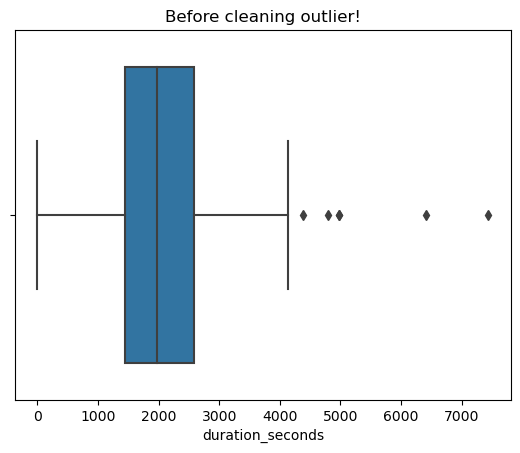

lower_check values : -281.875
upper_check values : 4297.125


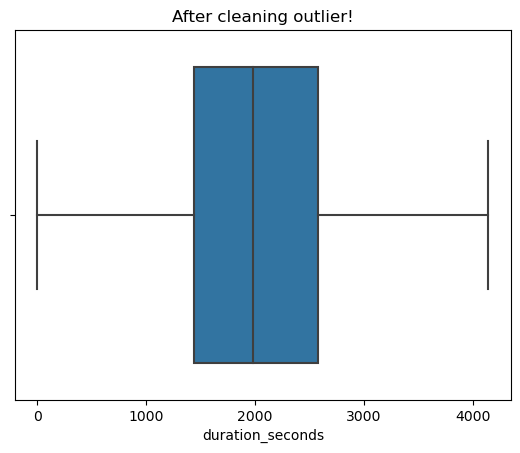


------ [RE-START] cleaning outlier in duration_seconds column ------ 

lower values : -281.875
upper values : 4297.125


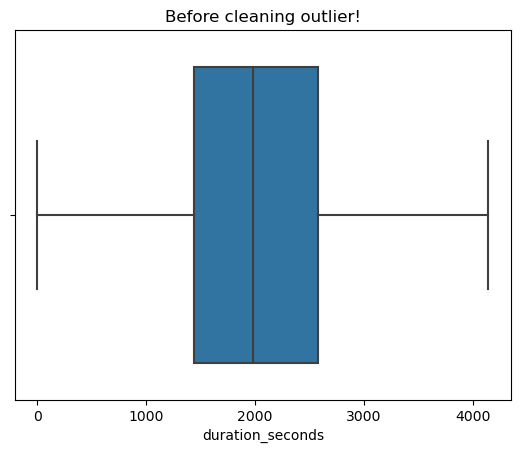

lower_check values : -281.875
upper_check values : 4297.125


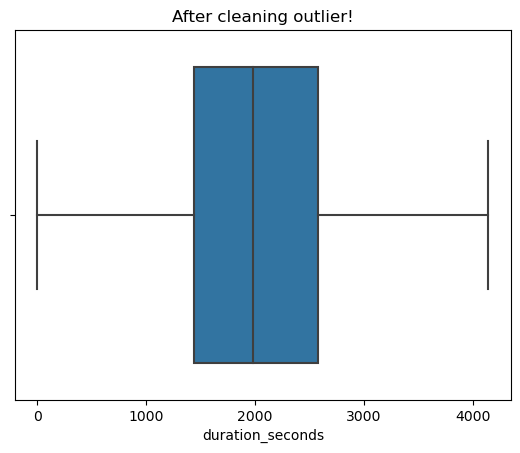


====== [FINISHED] outlier in [duration_seconds] column has been clear! ====== 



In [18]:
df_loop_to_airport = outlier_cleansing(dataframe=df_loop_to_airport, column='duration_seconds')

In [19]:
upper_lower_whisker(df_loop_to_airport['duration_seconds'])

(-281.875, 4297.125)

Proses penanganan outlier diatas secara sederhana dilakukan secara berulang dengan membandingkan batas outlier pada 2 dataframe antara dataframe dengan outlier dan dataframe tanpa outlier. Apabila tidak ada perbedaan antara 2 dataframe tersebut, maka proses penanganan outlier telah selesai. Sebaliknya bila belum sama, maka proses akan diulang kembali hingga batas outlier membalikan nilai yang sama dari 2 dataframe. 

In [20]:
alpha=0.05
df_loop_to_airport_bad = df_loop_to_airport[df_loop_to_airport['weather_conditions'] == 'Bad']['duration_seconds']
df_loop_to_airport_good = df_loop_to_airport[df_loop_to_airport['weather_conditions'] == 'Good']['duration_seconds']

In [21]:
levene_test = st.levene(df_loop_to_airport_bad, df_loop_to_airport_bad)
equal_var = False

if levene_test.pvalue > alpha:
    equal_var = True
    

Langkah terakhir adalah menguji hipotesis. Sebelum kita melakukan uji hipotesis, kita perlu mengetahui equal_var yang akan digunakan dengan menggunakan metode levene test yang ada pada library scipy. Setelah kita dapatkan hasilnya, kita bisa meneruskan hasil equal_var ke metode pengujian hipotesis.

In [22]:

results = st.ttest_ind(df_loop_to_airport_bad, df_loop_to_airport_good, equal_var=equal_var)

if results.pvalue < alpha:
    print('Kita menerima hipotesis 0. Rata-rata durasi perjalanan dari Loop ke Bandara berbeda ketika hujan di hari Sabtu.')
else:
    print('Kita menolak hipotesis 0. Rata-rata durasi perjalanan dari Loop ke Bandara tidak jauh berbeda dan atau sama ketika hujan di hari Sabtu.')

Kita menerima hipotesis 0. Rata-rata durasi perjalanan dari Loop ke Bandara berbeda ketika hujan di hari Sabtu.


Pada pengujian hipotesis kali ini, probabilitas rata-rata durasi perjalanan dari Loop ke Bandara sama sangat kecil dengan nilai dibawah 1%. Sehingga dapat disimpulkan bahwa durasi rata-rata durasi perjalanan berbeda ketika hujan terjadi. 

## Kesimpulan 

Pada penelitian ini, tidak banyak masalah yang kita dapatkan pada fase pra-pemrosesan data. Karena data yang kita terima sudah dalam kondisi yang sangat baik untuk dianalisa. Dan dari hasil analisa yang dilakukan, kita mendapatkan informasi bahwa Flash Cab merupakan perusahaan taksi yang paling populer pada tanggal 15-16 November 2017. Dan kota Loop menjadi kota dengan rata-rata destinasi terbanyak di bulan November 2017. 

Hipotesis yang diberikan juga sesuai dengan hasil uji hipotesis yang dilakukan. Dari hasil pengujian, juga terbukti bahwa rata-rata durasi perjalanan dari Loop ke Bandara O'Hare pada hari sabtu berbeda ketika hujan, dengan durasi lebih lama. 